In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import time


In [4]:
file_path = r'C:\Users\ACER\Desktop\НН ФТІ\Спец_розділи_програмування\Лабораторна_4\household_power_consumption.txt'


def read_csv_pd(file_path):
    dtype = {
    'Date' : object,
    'Time' : object,
    'Global_active_power': float,
    'Global_reactive_power' : float,
    'Voltage' : float,
    'Global_intensity' : float,
    'Sub_metering_1' : float,
    'Sub_metering_2' : float,
    'Sub_metering_3' : float,
    }

    df = pd.read_csv(file_path, sep=';', skiprows=1, names=['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], dtype=dtype, na_values='?')

    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time


    return df


# Робота з dataFrame
df = read_csv_pd(file_path)
# missing_count_nan = df.isna().sum()
df = df.dropna()

# print(missing_count_nan)


<h3> Перша частина(pandas)</h3>


In [10]:
#1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.
a = time.time()

Global_active_power_1 = df[df["Global_active_power"] > 5.0]

b = time.time()
print((b-a)/1000)


# 2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.
a = time.time()

Voltage = df[df["Voltage"] > 235.0]

b = time.time()
print((b-a)/1000)


# 3. Обрати всі домогосподарства, у яких сила струму лежить в межах
# 19-20 А, для них виявити ті, у яких пральна машина та холодильних
# споживають більше, ніж бойлер та кондиціонер.
a = time.time()

selected_households = df[(df["Global_intensity"] >= 19) & (df["Global_intensity"] <= 20)]
selected_households = selected_households[(selected_households["Sub_metering_2"] + selected_households["Sub_metering_3"]) >
                                          (selected_households["Sub_metering_1"] + selected_households["Sub_metering_3"])]
b = time.time()
print((b-a)/1000)


# 4. Обрати випадковим чином 500000 домогосподарств (без повторів
# елементів вибірки), для них обчислити середні величини усіх 3-х
# груп споживання електричної енергії, а також
a = time.time()

random_sample = df.sample(n=500000, replace=False)
average_consumption = random_sample[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

b = time.time()
print((b-a)/1000)


# 5. Обрати ті домогосподарства, які після 18-00 споживають понад 6
# кВт за хвилину в середньому, серед відібраних визначити ті, у яких
# основне споживання електроенергії у вказаний проміжок часу
# припадає на пральну машину, сушарку, холодильник та освітлення
# (група 2 є найбільшою), а потім обрати кожен третій результат із
# першої половини та кожен четвертий результат із другої половини.
a = time.time()

time1 = datetime.strptime("18:00:00", '%H:%M:%S').time()
after_18_consumption = df[df["Time"] > time1]
selected_after_18 = after_18_consumption[after_18_consumption["Global_active_power"] > 6.0]
selected_after_18_group2 = selected_after_18[(selected_after_18["Sub_metering_2"] > selected_after_18["Sub_metering_1"]) &
                                             (selected_after_18["Sub_metering_2"] > selected_after_18["Sub_metering_3"]) &
                                             (selected_after_18["Sub_metering_2"] > selected_after_18["Sub_metering_1"]) &
                                             (selected_after_18["Sub_metering_2"] > selected_after_18["Sub_metering_3"])]
# iloc[row_indexer, column_indexer]
first_half = selected_after_18_group2.iloc[:len(selected_after_18_group2)//2, :]
second_half = selected_after_18_group2.iloc[len(selected_after_18_group2)//2:, :]

selected_results = pd.concat([first_half.iloc[::3, :], second_half.iloc[::4, :]])

b = time.time()
print((b-a)/1000)

5.414557456970215e-05
0.00018336653709411622
1.9623756408691408e-05
0.00034221243858337404
0.00013436245918273926


<h3>Перша частина(numpy)</h3>

In [11]:
ar = df.to_numpy()

# 1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.
a = time.time()

Global_active_power_2 = ar[ar[:, 2] > 5.0]

b = time.time()
print((b-a)/1000.0)

# 2. Обрати всі домогосподарства, у яких вольтаж перевищує 235 В.
a = time.time()

task_2 = ar[ar[:, 4] > 235.0]

b = time.time()
print((b-a)/1000.0)


# 3. Вибрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А
a = time.time()
task_3 = ar[(ar[:, 5] >= 19.0) & (ar[:, 5] <= 20.0)]

# Для вибраних домогосподарств визначити ті, у яких пральна машина та холодильник споживають більше, ніж бойлер та кондиціонер
task_3_additional = task_3[task_3[:, 6:8].sum(axis=1) > task_3[:, 8:10].sum(axis=1)]
b = time.time()
print((b-a)/1000)


# 4. Вибрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки)
a = time.time()
task_4 = ar[np.random.choice(ar.shape[0], 500000, replace=False)]

# Обчислити середні величини усіх 3-х груп споживання електричної енергії
task_4_group1 = np.mean(task_4[:, 6:7])
task_4_group2 = np.mean(task_4[:, 7:8])
task_4_group3 = np.mean(task_4[:, 8:9])

b = time.time()
print((b-a)/1000)

# 5. Вибрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому
# Задання часу 18:00:00
time1 = datetime.strptime("18:00:00", '%H:%M:%S').time()
a = time.time()
# Відбір рядків, які відповідають часу після 18:00:00
ar_18_consumption = ar[ar[:, 1] > time1]

# Відбір рядків зі споживаною потужністю більше 6.0
ar_18 = ar_18_consumption[ar_18_consumption[:, 2] > 6.0]

# Визначення групи 2 за допомогою NumPy
group_1 = (ar_18[:, 7] > ar_18[:, 6])
group_2 = (ar_18[:, 7] > ar_18[:, 8])

ar_18_group2 = ar_18[group_2]
ar_18_group1 = ar_18[group_1]
# Розподіл результатів на першу та другу половину
first_half_idx = len(ar_18_group2) // 2
first_half = ar_18_group2[:first_half_idx]

second_half_idx = len(ar_18_group2) - first_half_idx
second_half = ar_18_group2[first_half_idx:]

# Вибір кожного третього результату з першої половини та кожного четвертого з другої половини
result = np.concatenate([first_half[::3], second_half[::4]])
b = time.time()
print((b-a)/1000)


6.593084335327148e-05
0.0003762221336364746
8.458542823791504e-05
0.0014171226024627685
0.0002064659595489502


<h4> Із отриманих показників можна зробити висновок, що pandas швидше обробляє дані ніж numpy. 
    Але на мою думку це залежить від реалізації, тому якщо врахувати цей аспект, то numpy та pandas +- рівні</h4>

<h3> Друга частина</h3>

In [2]:
file_path = 'kidney_disease.csv'
df = pd.read_csv(file_path)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
#1. Поборотися із зниклими даними
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [4]:
df[['age', 'rc']] = df[['age', 'rc']].fillna(0)
df[['age', 'rc']]


,age,rc
0,48.0,5.2
1,7.0,0
2,62.0,0
3,48.0,3.9
4,51.0,4.6
...,...,...
395,55.0,4.9
396,42.0,6.2
397,12.0,5.4
398,17.0,5.9


In [5]:
df[['age', 'rc']].isnull().sum()

age    0
rc     0
dtype: int64

In [6]:
#перетворемо стовпчик 'rc' бо можливо містить "0" або "normal"
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

In [7]:
# 2. Пронормувати вибраний датасет або стандартизувати його
# (нормалізація і стандартизація мають бути реалізовані як окремі
# функції без застосування додаткових бібліотек, як наприклад
# sklearn.preprocessing).

In [8]:
# Нормалізація
value_min = df[['age', 'rc']].min()
value_max = df[['age', 'rc']].max()

df_norm = (df[['age', 'rc']] - value_min) / (value_max - value_min)
df_norm 

,age,rc
0,0.533333,0.6500
1,0.077778,0.0000
2,0.688889,0.0000
3,0.533333,0.4875
4,0.566667,0.5750
...,...,...
395,0.611111,0.6125
396,0.466667,0.7750
397,0.133333,0.6750
398,0.188889,0.7375


In [9]:
# Стандартизація

df_std = (df[['age', 'rc']] - df[['age', 'rc']].mean()) / df[['age', 'rc']].std()
df_std


,age,rc
0,-0.124886,0.857211
1,-2.327180,-1.342593
2,0.627117,-1.342593
3,-0.124886,0.307260
4,0.036257,0.603388
...,...,...
395,0.251115,0.730299
396,-0.447173,1.280250
397,-2.058608,0.941819
398,-1.790035,1.153338


<Axes: xlabel='age', ylabel='Count'>

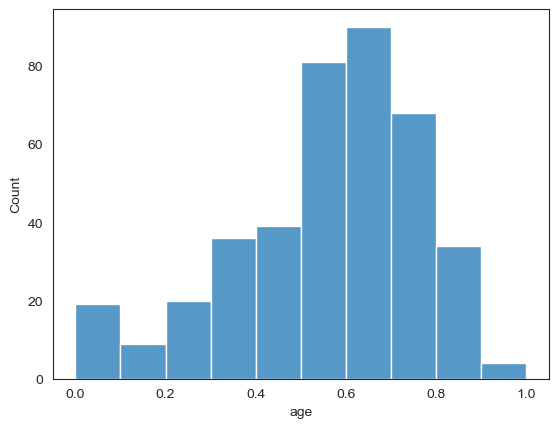

In [10]:
# 3. Збудувати гістограму по одному із атрибутів, що буде показувати на
# кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.
sns.set_style("white")
sns.histplot(df_norm['age'], bins=10)

<Axes: xlabel='age', ylabel='rc'>

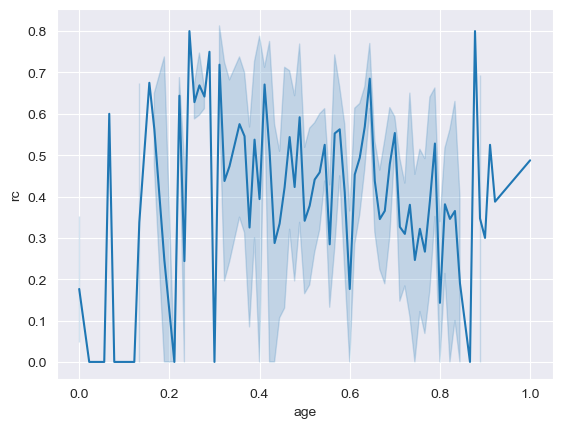

In [11]:
# 4. Збудувати графік залежності одного integer/real атрибута від іншого.
sns.set_style("darkgrid")
sns.lineplot(df_norm, x = 'age', y = 'rc')

In [12]:
# 5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real
# атрибутів.
df_norm.dropna(inplace=True)
P = scipy.stats.pearsonr(df_norm["age"], df_norm['rc'])
S = scipy.stats.spearmanr(df_norm["age"], df_norm['rc'])
print('Pearson:', P, "Spearson:", S)

Pearson: PearsonRResult(statistic=0.012593040401193786, pvalue=0.8019946122017462) Spearson: SignificanceResult(statistic=-0.10670292494015797, pvalue=0.03310653733507379)


In [32]:
# 6. Провести One Hot Encoding категоріального string атрибуту.
df_ohe = df.copy()
df_ohe

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,0.0,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,0.0,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [33]:
df_ohe = pd.concat([df_ohe, pd.get_dummies(df_ohe['pcc'], dtype=int)], axis=1).drop('pcc', axis=1)
df_ohe

,id,age,bp,sg,al,su,rbc,pc,ba,bgr,...,rc,htn,dm,cad,appet,pe,ane,classification,notpresent,present
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,121.0,...,5.2,yes,yes,no,good,no,no,ckd,1,0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,NaN,...,0.0,no,no,no,good,no,no,ckd,1,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,423.0,...,0.0,no,yes,no,poor,no,yes,ckd,1,0
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,notpresent,117.0,...,3.9,yes,no,no,poor,yes,yes,ckd,0,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,106.0,...,4.6,no,no,no,good,no,no,ckd,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,140.0,...,4.9,no,no,no,good,no,no,notckd,1,0
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,75.0,...,6.2,no,no,no,good,no,no,notckd,1,0
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,100.0,...,5.4,no,no,no,good,no,no,notckd,1,0
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,114.0,...,5.9,no,no,no,good,no,no,notckd,1,0


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


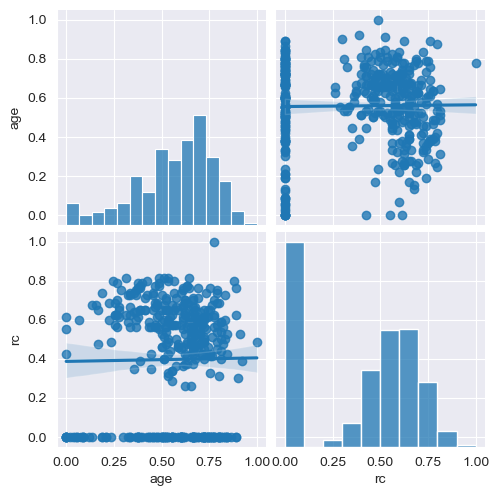

In [14]:
sns.pairplot(df_norm[['age', 'rc']], kind="reg")
